# DTW and Zero Flow Analysis Code
Written by Danielle Tadych

 The purpose of this script is to determine if there is a statistical relationship between DTW and number of zero flow days for reaches

## Loading packages and files

In [137]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import CustomFunctions as cf


# Data paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local/'

In [138]:
# %%  ==== Reading in the data ====
# Define some things about your file

StudyArea = "HUC12s"
Naming_col = "huc12"
distance = 2000

# Now to read in the streamflow data
filename_ts = f'/{Naming_col}_average_flow_onlyoutlets.csv'
annual_db = pd.read_csv(outputpath+filename_ts, header=1, index_col=0)

#Block to do some formatting
annual_db = annual_db[0:168102]
annual_db.index = annual_db.index.astype('int64')
zero_flow = annual_db.reset_index(inplace=True)
zero_flow = annual_db.rename(columns = {'Year':'index'})
zero_flow.set_index('index', inplace=True)
print(zero_flow.head())

# Read in the annual time series database
filepath = outputpath + f'{StudyArea}bufferedflowlines{distance}_MedianYearlyDTW.csv'
dtw = pd.read_csv(filepath, index_col=0)
dtw = dtw.transpose()
dtw.index = dtw.index.astype('int64')
dtw.reset_index(inplace=True)
dtw = dtw.rename(columns = {'year':'index'})
dtw.set_index('index', inplace=True)
# print("Water Levels for "+StudyArea+" Analysis loaded.")
# dtw


              1980  1985  1986  1987  1988  1989  1990  1991  1992  1993  ...  \
index                                                                     ...   
150100010508   NaN   0.0   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...   
150100010607   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0  ...   
150100010608   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0  ...   
150100020101   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
150100020405   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0  ...   

              2016  2017  2018  2019  2020  2021  2022  2023  2024  2025  
index                                                                     
150100010508   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
150100010607   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
150100010608   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
150100020101   NaN   0.0   0.0   0.0   0.0   0.0   0.0   

In [139]:
dtw

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
index,,,,,,,,,,,,,,,,,,,,,
150100090304,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100100208,36.55,36.635,54.55,NaN,38.90,60.0,55.0,36.0,65.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100100312,36.55,55.270,54.55,NaN,40.15,60.0,55.0,36.0,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100100602,10.00,NaN,NaN,NaN,25.00,10.0,NaN,30.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150200010101,NaN,NaN,20.00,NaN,NaN,NaN,20.0,15.0,29.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150803010406,NaN,60.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.5,...,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150803010407,NaN,0.000,51.50,55.0,48.40,NaN,NaN,53.5,50.0,NaN,...,59.5,59.8,59.8,60.5,60.8,68.7,70.10,60.9,59.8,NaN
150803010408,NaN,0.000,48.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.9,NaN,NaN,NaN,NaN,NaN,137.80,NaN,NaN,NaN


In [140]:
# %% Creating colors
c_1 = '#8d5a99' # Reservation
c_2 = "#d7191c" # Regulated with CAP (Water Category Color)
c_3 = '#e77a47' # Regulated without CAP (Water Category Color)
c_4 = '#2cbe21' # Lower CO River - SW (Water Category Color)
c_5 = '#2f8c73' # Upper CO River - Mixed (Water Category Color)
c_6 = '#6db7e8' # SE - GW
c_7 = '#165782' # NW - GW (Water Category color)
c_8 = '#229ce8' # SC - GW
c_9 = '#1f78b4' # NE - GW
c_10 = '#41bf9e' # N - Mixed
c_11 = '#7adec4' # C - Mixed
drought_color = '#ffa6b8'
wet_color = '#b8d3f2'

reg_colors = [c_2,c_7]
georeg_colors = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11]
SW_colors = [c_2,c_3,c_4,c_5,c_7]

bar_watercatc = [c_2,c_3,c_4,c_5,c_7]


# Color blind palette
# https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
cblind =["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# Matching new map

grace_color = '#A92B2A'
az_wells_color = '#1D4E77'

cap = '#77A8A5' #'#C6652B'
cap_secondary = '#004D40'
# noCAP = '#EDE461' # This is one from the map
noCAP = '#CCC339' # This color but darker for lines
GWdom = '#3B76AF'
mixed = '#6EB2E4'
swdom = '#469B76'

In [159]:
# Find common HUC12s in both datasets
common_hucs = dtw.index.intersection(zero_flow.index)
common_hucs

Int64Index([150100100208, 150100100602, 150200020103, 150200080206,
            150301070105, 150302040409, 150400060808, 150501000111,
            150502020507, 150503010908, 150503040405, 150601060306,
            150602020108, 150701020206, 150701030311, 150701030507,
            150702010803, 150702011502],
           dtype='int64', name='index')

In [160]:
# Subset both datasets to only include common HUC12s
dtw_df = dtw.loc[common_hucs]
zero_flow_df = zero_flow.loc[common_hucs]


In [161]:
zero_flow_df = zero_flow_df.iloc[:, :-1]  # Drops the last column


In [162]:
# Convert to numeric
dtw_df = dtw_df.apply(pd.to_numeric, errors="coerce")
zero_flow_df = zero_flow_df.apply(pd.to_numeric, errors="coerce")


In [165]:
dtw_df

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
index,,,,,,,,,,,,,,,,,,,,,
150100100208,36.55,36.635,54.550,NaN,38.90,60.00,55.00,36.00,65.00,59.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150100100602,10.00,NaN,NaN,NaN,25.00,10.00,NaN,30.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150200020103,NaN,NaN,NaN,NaN,NaN,NaN,33.50,20.00,NaN,130.00,...,22.500,NaN,NaN,NaN,NaN,NaN,25.00,NaN,NaN,NaN
150200080206,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150301070105,12.00,NaN,NaN,5.00,11.00,11.00,12.25,15.00,18.50,58.50,...,79.000,NaN,NaN,16.0000,NaN,NaN,NaN,NaN,NaN,NaN
150302040409,NaN,NaN,NaN,NaN,17.10,22.70,17.66,NaN,21.72,14.85,...,NaN,NaN,NaN,NaN,15.500,NaN,NaN,NaN,NaN,NaN
150400060808,30.00,NaN,20.000,NaN,41.00,NaN,NaN,32.80,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150501000111,NaN,NaN,30.000,29.50,NaN,NaN,NaN,NaN,NaN,NaN,...,27.900,30.1000,30.3000,36.4000,32.500,28.300000,19.95,25.5,24.600,NaN
150502020507,20.00,46.000,33.000,103.00,65.00,55.00,42.00,59.80,30.70,60.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now this method gets rid of all nan's where they don't have points in common

In [164]:
df_dtw = dtw_df.copy()
df_nzf = zero_flow_df.copy()

# Ensure HUC12 is a column, not an index
df_dtw = df_dtw.reset_index()
df_nzf = df_nzf.reset_index() 

# Melt DTW DataFrame
df_dtw_melted = df_dtw.melt(id_vars=["index"], var_name="Year", value_name="DTW")
df_dtw_melted["Year"] = df_dtw_melted["Year"].astype(int)

# Melt NZF DataFrame
df_nzf_melted = df_nzf.melt(id_vars=["index"], var_name="Year", value_name="NZF")
df_nzf_melted["Year"] = df_nzf_melted["Year"].astype(int)

# Merge melted dataframes
df_final = df_dtw_melted.merge(df_nzf_melted, on=["index", "Year"])

# Print to check the result
df_final


,index,Year,DTW,NZF
0,150100100208,1980,36.55,NaN
1,150100100602,1980,10.00,NaN
2,150200020103,1980,NaN,NaN
3,150200080206,1980,21.00,NaN
4,150301070105,1980,12.00,NaN
...,...,...,...,...
733,150701020206,2024,NaN,0.0
734,150701030311,2024,NaN,327.0
735,150701030507,2024,123.00,13.0
736,150702010803,2024,NaN,360.0


In [154]:
df_final = df_final.dropna(subset=["DTW", "NZF"])
df_final

,index,Year,DTW,NZF
36,150100100208,1986,55.000,4.0
54,150100100208,1987,36.000,0.0
55,150100100602,1987,30.500,0.0
56,150200020103,1987,20.000,0.0
66,150602020108,1987,69.850,0.0
...,...,...,...,...
714,150602020108,2023,108.860,0.0
716,150701030311,2023,42.800,244.0
717,150701030507,2023,36.525,0.0
732,150602020108,2024,108.710,0.0


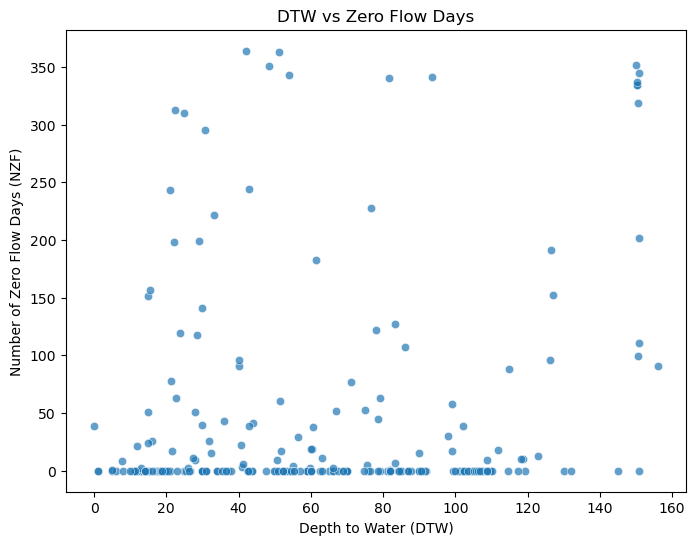

In [155]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x="DTW", y="NZF", alpha=0.7)
plt.xlabel("Depth to Water (DTW)")
plt.ylabel("Number of Zero Flow Days (NZF)")
plt.title("DTW vs Zero Flow Days")
plt.show()

In [156]:
print('Pearson Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='pearson')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=pearsonr_pval), 4)))

Pearson Correlation Coefficient
  rsq = 0.043
  pval = 0.0011


In [157]:
print('Spearman Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='spearman')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=spearmanr_pval), 4)))

Spearman Correlation Coefficient
  rsq = 0.017
  pval = 0.0409


In [158]:
print('Kendall Correlation Coefficient')
df1 = df_final['DTW']
df2 = df_final['NZF']
r = df1.corr(df2, method='kendall')
print('  rsq = ' + str(round(r * r, 3)))
print('  pval = ' + str(round(df1.corr(df2, method=kendall_pval), 4)))

Kendall Correlation Coefficient
  rsq = 0.009
  pval = 0.0423


In [113]:
df1 = dtw_df.transpose()
df2 = zero_flow_df.transpose()
column_list = df1.columns.tolist()
for i in column_list:
    print("HUC: ", i)
    r = df1[i].corr(df2[i], method='pearson')
    print('  rsq = ' + str(round(r * r, 3)))
    print('  pval = ' + str(round(df1[i].corr(df2[i], method=pearsonr_pval), 4)))

HUC:  150100100208
  rsq = nan
  pval = nan
HUC:  150100100602
  rsq = nan
  pval = nan
HUC:  150200020103
  rsq = nan
  pval = nan
HUC:  150200080206
  rsq = nan
  pval = nan
HUC:  150502020507
  rsq = nan
  pval = nan
HUC:  150503010908
  rsq = nan
  pval = nan
HUC:  150503040405
  rsq = nan
  pval = nan
HUC:  150601060306
  rsq = nan
  pval = nan
HUC:  150701020206
  rsq = nan
  pval = nan
HUC:  150701020607
  rsq = nan
  pval = nan
HUC:  150701030311
  rsq = nan
  pval = nan
HUC:  150701030507
  rsq = nan
  pval = nan
HUC:  150702011502
  rsq = nan
  pval = nan


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1980 to 2024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   150100100208  33 non-null     float64
 1   150100100602  28 non-null     float64
 2   150200020103  29 non-null     float64
 3   150200080206  25 non-null     float64
 4   150502020507  36 non-null     float64
 5   150503010908  38 non-null     float64
 6   150503040405  43 non-null     float64
 7   150601060306  43 non-null     float64
 8   150701020206  42 non-null     float64
 9   150701020607  41 non-null     float64
 10  150701030311  26 non-null     float64
 11  150701030507  41 non-null     float64
 12  150702011502  39 non-null     float64
dtypes: float64(13)
memory usage: 6.0+ KB


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1980 to 2024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   150100100208  39 non-null     float64
 1   150100100602  39 non-null     float64
 2   150200020103  37 non-null     float64
 3   150200080206  22 non-null     float64
 4   150502020507  32 non-null     float64
 5   150503010908  35 non-null     float64
 6   150503040405  32 non-null     float64
 7   150601060306  8 non-null      float64
 8   150701020206  25 non-null     float64
 9   150701020607  3 non-null      float64
 10  150701030311  35 non-null     float64
 11  150701030507  35 non-null     float64
 12  150702011502  37 non-null     float64
dtypes: float64(13)
memory usage: 5.5+ KB


ValueError: x and y must be the same size

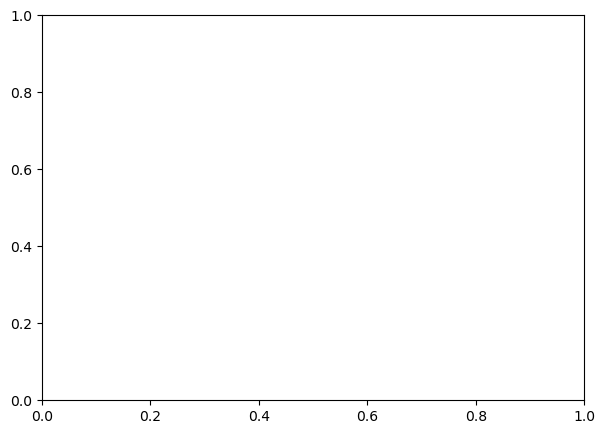

In [115]:
fig, ax = plt.subplots(figsize = (7,5))
for i in (column_list
                # ,reg_colors
                # , SW_colors
                # , colors_list
                # , label_list
                ):
        x = df1[i]
        y = df2[i]
        ax.scatter(x,y
                # , label=k
                # , color=j
                )
        # Trendline: 1=Linear, 2=polynomial
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x),'-'
                # , color=j
                # ,label=(k+' Trendline')
                )


# ax.set_xlabel(drought_indice)
# ax.set_ylabel(vert_axis_label)
# ax.set_title("Comparing "+drought_indice+" with "+test_dataset_name,loc='center',fontsize=14,pad=15)
# ax.set_ylim(0,400)
fig.set_dpi(600)
plt.legend(loc = [1.05, 0.40])